In [71]:
### Imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

#from config import key_dict
#gkey= key_dict['KEY NAME GOES HERE']


#Import CSV file
edu_data = "Resources/edu_impact2.csv"

edu_data_df = pd.read_csv(edu_data)

edu_data_df.head(10)





,Date,ISO,Country,Status,Note
0,1/3/2020,BGD,Bangladesh,Fully open,NaN
1,1/3/2020,BRA,Brazil,Fully open,NaN
2,1/3/2020,CHN,China,Closed due to COVID-19,NaN
3,1/3/2020,IDN,Indonesia,Fully open,NaN
4,1/3/2020,IND,India,Fully open,NaN
5,1/3/2020,MEX,Mexico,Fully open,NaN
6,1/3/2020,NGA,Nigeria,Fully open,NaN
7,1/3/2020,PAK,Pakistan,Partially open,NaN
8,1/3/2020,RUS,Russian Federation,Fully open,NaN
9,1/4/2020,BGD,Bangladesh,Closed due to COVID-19,NaN


In [72]:
#Cleaning Data, dropping unnecessary columns

to_drop = ["ISO","Note"]

edu_data_df.drop(to_drop, inplace= True, axis=1)

edu_data_df.head()


,Date,Country,Status
0,1/3/2020,Bangladesh,Fully open
1,1/3/2020,Brazil,Fully open
2,1/3/2020,China,Closed due to COVID-19
3,1/3/2020,Indonesia,Fully open
4,1/3/2020,India,Fully open


In [73]:
#Cleaning Data, renaming Status column to easier read title

edu_data_df.rename(columns={"$Status": "School Standings"})



,Date,Country,Status
0,1/3/2020,Bangladesh,Fully open
1,1/3/2020,Brazil,Fully open
2,1/3/2020,China,Closed due to COVID-19
3,1/3/2020,Indonesia,Fully open
4,1/3/2020,India,Fully open
...,...,...,...
2875,31/12/2020,India,Partially open
2876,31/12/2020,Mexico,Academic break
2877,31/12/2020,Nigeria,Academic break
2878,31/12/2020,Pakistan,Academic break


In [74]:
#Attempting to group the data by country
#WorkInProgress(Question to answer: How should this play out?  What information are we attempting to extract?)
#IDEAS:  How many sample days in 2020 were closures for sample countries, (possible to split by region?, or top 10 population?)


grouped_country_df = edu_data_df.groupby(["Country","Date","Status"])

print(grouped_country_df)

grouped_country_df.count().head(10)

Empty DataFrame
Columns: []
Index: [(Bangladesh, 1/10/2020, Closed due to COVID-19), (Bangladesh, 1/11/2020, Closed due to COVID-19), (Bangladesh, 1/12/2020, Closed due to COVID-19), (Bangladesh, 1/3/2020, Fully open), (Bangladesh, 1/4/2020, Closed due to COVID-19), (Bangladesh, 1/5/2020, Closed due to COVID-19), (Bangladesh, 1/6/2020, Academic break), (Bangladesh, 1/7/2020, Closed due to COVID-19), (Bangladesh, 1/8/2020, Closed due to COVID-19), (Bangladesh, 1/9/2020, Academic break)]

In [79]:
status_count_df = pd.DataFrame ({
    "Status" : ["Closed due to COVID-19"]
}
    index = ["Bangladesh", "Brazil", "China"])

Status_count_df

SyntaxError: invalid syntax (<ipython-input-79-28ba93886afa>, line 4)

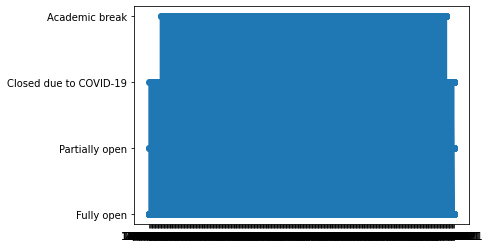

In [75]:
# plot_time_series.py
# (End result goal is to show top 10-25 countries affected with the the fastest Closures (and how long) due to Covid-19)


data = pd.read_csv("Resources/edu_impact.csv")
country = data["Country"]
status_date = data["Date"]
open_status = data["Status"]
plt.plot_date(status_date, open_status, linestyle='solid')



